In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
def build_plot(taxtype, indicators, plottitles, ylabels, xlabels, n=2, ylims=None):
    df = pd.read_csv(f'../results/experiments/OFAT_experiments/{taxtype}tax.csv')

    fig, ax = plt.subplots(1, n, figsize=(5*n,4))

    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    for i, indicator, title, ylabel, xlabel in zip(range(n), indicators, plottitles, ylabels, xlabels):
        
        mean = df.groupby('taxrate', as_index=False)[indicator].mean()
        std = df.groupby('taxrate', as_index=False)[indicator].std()

        ax[i].plot(mean['taxrate'], mean[indicator])
        ax[i].fill_between(mean['taxrate'], 
                           mean[indicator] + std[indicator], 
                           mean[indicator] - std[indicator], alpha=0.5)
        ax[i].set_title(title)
        ax[i].set_xlabel(xlabel)
        ax[i].set_ylabel(ylabel)

        if ylims != None:
            ax[i].set_ylim(ylims[i])
        
    return ax, mean

In [77]:
def n_plot(taxtype, indicators, plottitles, ylabels, xlabels, n=2):
    
    ax, mean = build_plot(taxtype, indicators, plottitles, ylabels, xlabels, n=n)

    plt.tight_layout()
    plt.show()

In [100]:
def n_plot_hlines(taxtype, indicators, plottitles, ylabels, xlabels, 
                  hlines, hlines_labels, hlines_colors, n=2, ylims=None, filename=None):
    
    ax, mean = build_plot(taxtype, indicators, plottitles, ylabels, xlabels, n=n, ylims=ylims)

    for i in range(n):
        for j, hline in enumerate(hlines):
            ax[i].hlines(hline[i], min(mean['taxrate']), max(mean['taxrate']), 
                         label=hlines_labels[j], color=hlines_colors[j])
            ax[i].legend(loc='lower left')

    plt.tight_layout()
    if filename != None:
        plt.savefig(f'experiments/{filename}')
    plt.show()

## Income tax

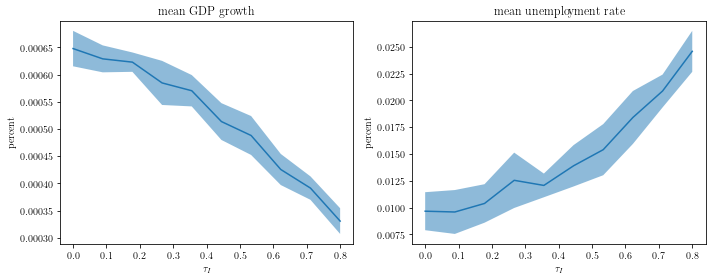

In [79]:
n_plot(
    'income', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_I$', '$\\tau_I$']
)

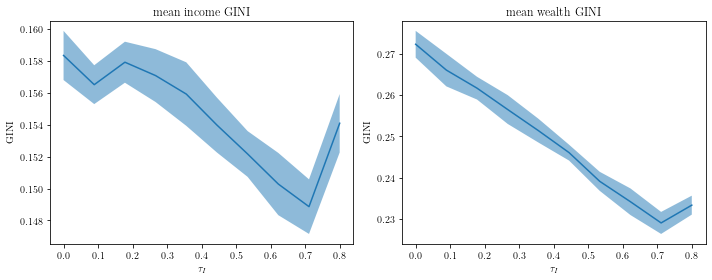

In [80]:
n_plot(
    'income', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_I$', '$\\tau_I$']
)

## Profit tax

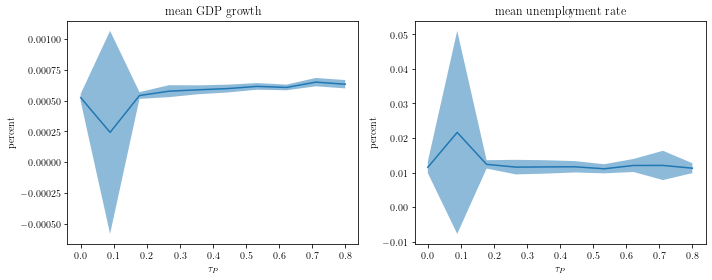

In [81]:
n_plot(
    'profit', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_P$', '$\\tau_P$']
)

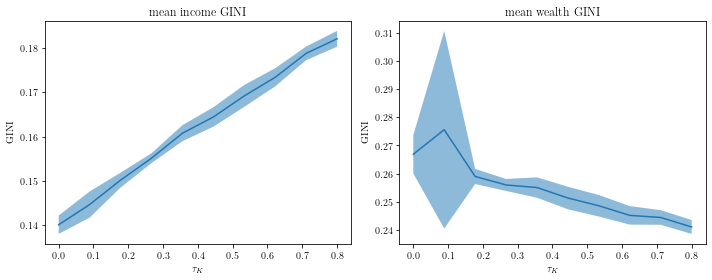

In [82]:
n_plot(
    'profit', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_K$', '$\\tau_K$']
)

## Capital Tax

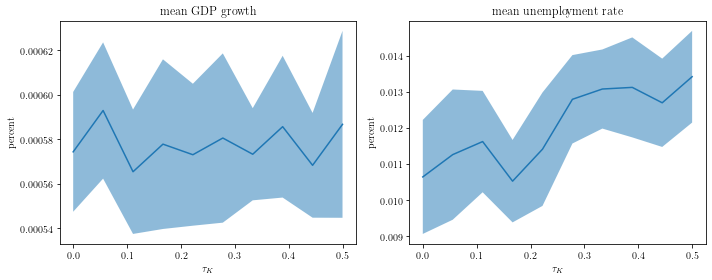

In [83]:
n_plot(
    'capital', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_K$', '$\\tau_K$']
)

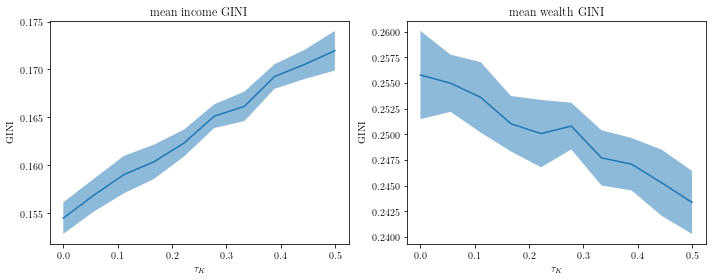

In [84]:
n_plot(
    'capital', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_K$', '$\\tau_K$']
)

## Carbon Tax

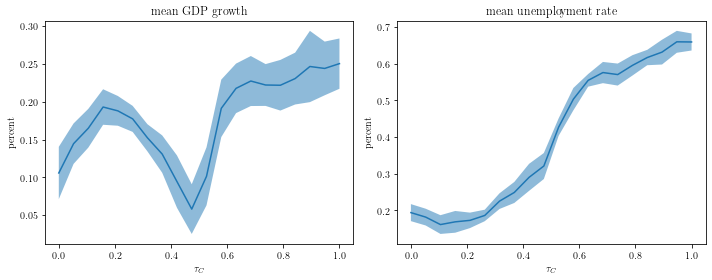

In [85]:
n_plot(
    'carbon', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_C$', '$\\tau_C$']
)

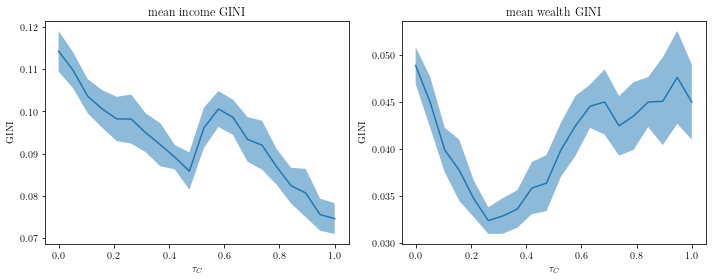

In [86]:
n_plot(
    'carbon', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_C$', '$\\tau_C$']
)

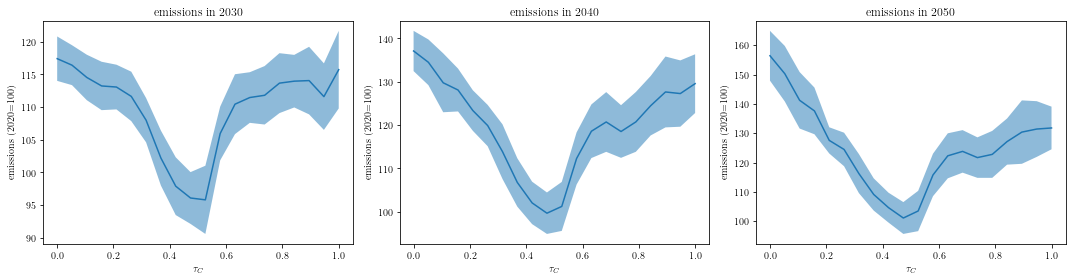

In [87]:
n_plot(
    'carbon', 
    ['em2030', 'em2040', 'em2050'], 
    ['emissions in 2030', 'emissions in 2040', 'emissions in 2050'], 
    ['emissions (2020=100)', 'emissions (2020=100)', 'emissions (2020=100)'], 
    ['$\\tau_C$', '$\\tau_C$', '$\\tau_C$'],
    n=3
)

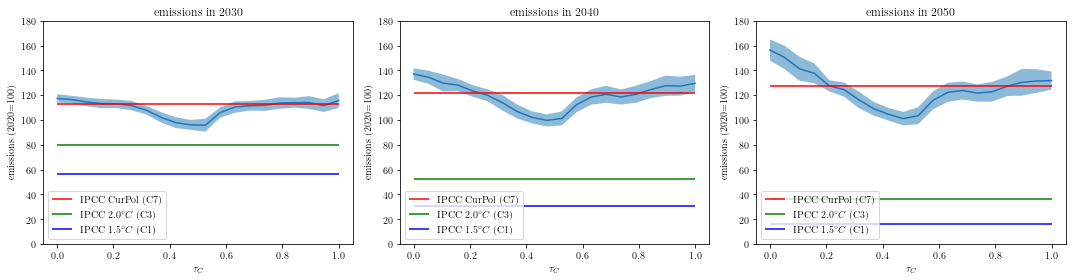

In [102]:
n_plot_hlines(
    'carbon', 
    ['em2030', 'em2040', 'em2050'], 
    ['emissions in 2030', 'emissions in 2040', 'emissions in 2050'], 
    ['emissions (2020=100)', 'emissions (2020=100)', 'emissions (2020=100)'], 
    ['$\\tau_C$', '$\\tau_C$', '$\\tau_C$'],
    [[112.72727273, 121.81818182, 127.27272727],
     [80., 52.72727273, 36.36363636],
     [56.36363636, 30.90909091, 16.36363636]],
    ['IPCC CurPol (C7)', 'IPCC $2.0^\circ C$ (C3)', 'IPCC $1.5^\circ C$ (C1)'],
    ['red', 'green', 'blue'],
    n=3,
    ylims=[(0, 180), (0, 180), (0, 180)],
    filename='carbontax_emissions.pdf'
)

## Sales tax

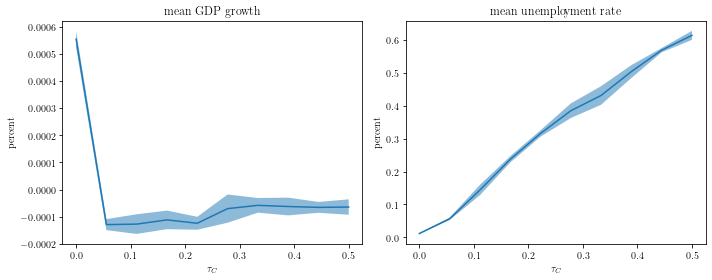

In [89]:
n_plot(
    'sales', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_C$', '$\\tau_C$']
)

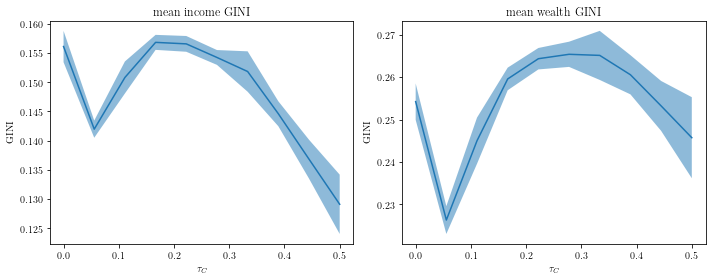

In [90]:
n_plot(
    'sales', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_C$', '$\\tau_C$']
)

## Energy tax

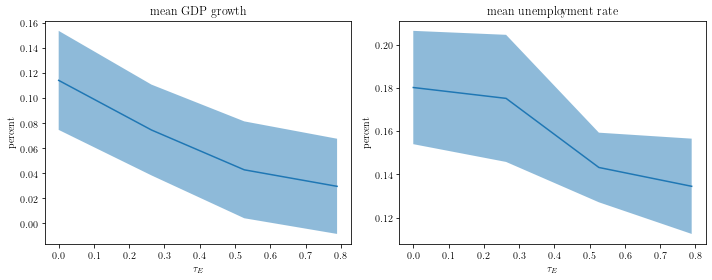

In [105]:
n_plot(
    'energy', 
    ['GDP_1st', 'U_1st'], 
    ['mean GDP growth', 'mean unemployment rate'], 
    ['percent', 'percent'], 
    ['$\\tau_E$', '$\\tau_E$']
)

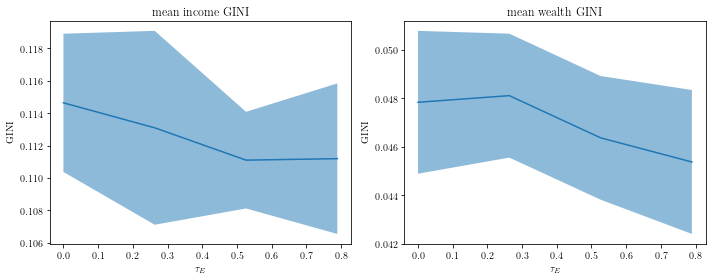

In [104]:
n_plot(
    'energy', 
    ['GINI_I_1st', 'GINI_W_1st'], 
    ['mean income GINI', 'mean wealth GINI'], 
    ['GINI', 'GINI'], 
    ['$\\tau_E$', '$\\tau_E$']
)

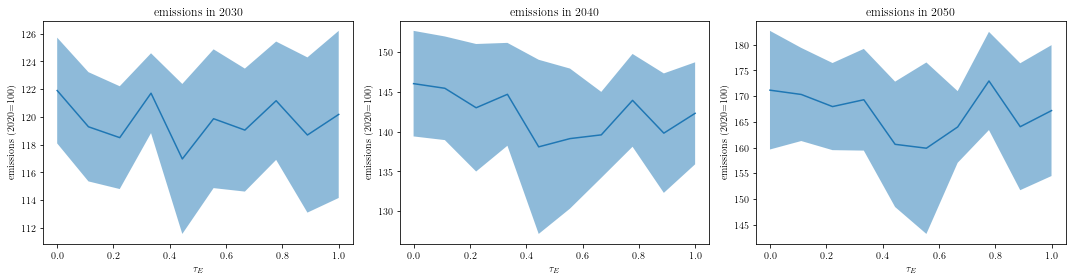

In [93]:
n_plot(
    'energy', 
    ['em2030', 'em2040', 'em2050'], 
    ['emissions in 2030', 'emissions in 2040', 'emissions in 2050'], 
    ['emissions (2020=100)', 'emissions (2020=100)', 'emissions (2020=100)'], 
    ['$\\tau_E$', '$\\tau_E$', '$\\tau_E$'],
    n=3
)

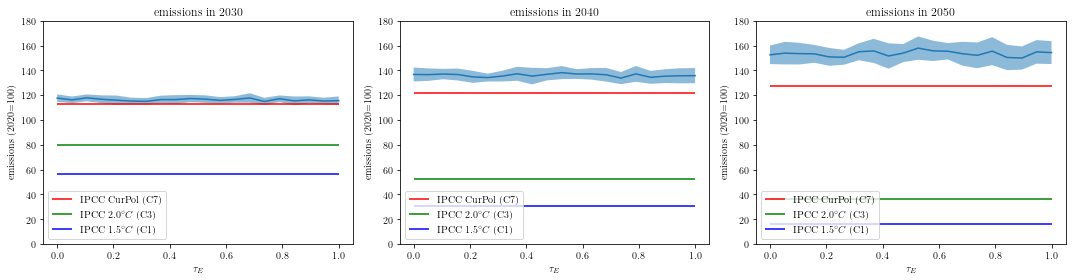

In [107]:
n_plot_hlines(
    'energy', 
    ['em2030', 'em2040', 'em2050'], 
    ['emissions in 2030', 'emissions in 2040', 'emissions in 2050'], 
    ['emissions (2020=100)', 'emissions (2020=100)', 'emissions (2020=100)'], 
    ['$\\tau_E$', '$\\tau_E$', '$\\tau_E$'],
    [[112.72727273, 121.81818182, 127.27272727],
     [80., 52.72727273, 36.36363636],
     [56.36363636, 30.90909091, 16.36363636]],
    ['IPCC CurPol (C7)', 'IPCC $2.0^\circ C$ (C3)', 'IPCC $1.5^\circ C$ (C1)'],
    ['red', 'green', 'blue'],
    n=3,
    ylims=[(0, 180), (0, 180), (0, 180)],
    filename='energytax_emissions.pdf'
)